In [198]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [166]:
customerD = pd.read_csv('customer_details.csv')
customerPD = pd.read_csv('customer_policy.csv')

## 1. Add the column names to both datasets:

### i. Column Name for customer details table:

In [167]:
customerD.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [168]:
customerD.rename(columns={'0':'customer_id','1':'Gender','2':'age','3':'driving licence present','4':'region code','5':'previously insured','6':'vehicle age','7':'vehicle damage'})

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
183034,183035.0,Female,23.0,1.0,7.0,1.0,< 1 Year,No
183035,183036.0,Female,25.0,1.0,34.0,0.0,< 1 Year,No
183036,183037.0,Male,21.0,1.0,46.0,1.0,< 1 Year,No
183037,183038.0,Male,32.0,1.0,18.0,1.0,< 1 Year,No


In [169]:
customerD = customerD.rename(columns={'0':'customer_id','1':'Gender','2':'age','3':'driving licence present','4':'region code','5':'previously insured','6':'vehicle age','7':'vehicle damage'})

In [170]:
customerD.head(2)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No


In [171]:
customerD.columns

Index(['customer_id', 'Gender', 'age', 'driving licence present',
       'region code', 'previously insured', 'vehicle age', 'vehicle damage'],
      dtype='object')

## ii. Column Name for customer_policy table:

In [176]:
customerPD.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [177]:
customerPD.rename(columns={'0':'customer_id','1':'annual premium (in Rs)','2':'sales channel code','3':'vintage','4':'response'})

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [178]:
customerPD =(customerPD.rename(columns={'0':'customer_id','1':'annual premium (in Rs)','2':'sales channel code','3':'vintage','4':'response'}))

In [179]:
customerPD.columns

Index(['customer_id', 'annual premium (in Rs)', 'sales channel code',
       'vintage', 'response'],
      dtype='object')

## 2. Checking and Cleaning Data Quality:

### i. Null values

##### Generate a summary of count of all the null values column wise
##### Drop Null values for customer_id because central tendencies for id’s is not feasible.
##### Replace all null values for numeric columns by mean. 
##### Replace all null values for Categorical value by mode.

In [21]:
customerD.isnull().sum()

customer_id                175
Gender                     175
age                        196
driving licence present    201
region code                199
region code                190
previously insured         169
vehicle age                202
dtype: int64

In [22]:
customerPD.isnull().sum()

customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64

In [23]:
customerD['customer_id'].isna().sum()

175

In [24]:
customerPD['customer_id'].isna().sum()

387

In [25]:
customerD['customer_id'].count()

182864

In [26]:
customerPD['customer_id'].count()

380722

### Replace all null values for numeric columns by mean

In [28]:
## Drop null values for customer_id

customerPD = customerPD.dropna(subset=['customer_id'])

In [37]:
customerPD['customer_id'].mean()

190547.49166320832

In [29]:
customerPD['annual premium (in Rs)'].fillna((customerPD['annual premium (in Rs)'].mean()),inplace=True)

In [30]:
customerPD['annual premium (in Rs)'].mean()

30563.99977390893

In [33]:
customerPD['sales channel code'].fillna((customerPD['sales channel code'].mean()),inplace=True)

In [34]:
customerPD['sales channel code'].mean()

112.03668733336546

In [35]:
customerPD['vintage'].fillna((customerPD['vintage'].mean()),inplace=True)

In [36]:
customerPD['vintage'].mean()

154.34719220474696

In [38]:
customerPD['response'].fillna((customerPD['response'].mean()),inplace=True)

In [39]:
customerPD['response'].mean()

0.12252570584260679

In [40]:
customerPD.isnull().sum()

customer_id               0
annual premium (in Rs)    0
sales channel code        0
vintage                   0
response                  0
dtype: int64

In [45]:
customerD.isnull().sum()

0    175
1    175
2    196
3    201
4    199
5    190
6    169
7    202
dtype: int64

In [67]:
customerD=customerD.dropna(subset=['customer_id'])
customerD=customerD.dropna(subset=['vehicle damage'])
customerD=customerD.dropna(subset=['vehicle age'])
customerD=customerD.dropna(subset=['previously insured'])
customerD=customerD.dropna(subset=['region code'])
customerD=customerD.dropna(subset=['driving licence present'])
customerD=customerD.dropna(subset=['Gender'])
customerD=customerD.dropna(subset=['age'])

In [69]:
customerD.head(2)

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No


In [70]:
customerD.isnull().sum()

customer_id                0
Gender                     0
age                        0
driving licence present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64

### Replace all null values for Categorical value by mode

In [172]:
customerD.isnull().sum()

customer_id                175
Gender                     175
age                        196
driving licence present    201
region code                199
previously insured         190
vehicle age                169
vehicle damage             202
dtype: int64

In [173]:
#customerD = customerD.replace(customerD.fillna((customerD.mod().iloc[0]),inplace=True),np.NaN)


customerD['customer_id'].fillna((customerD['customer_id'].mode()), inplace=True)
customerD['Gender'].fillna((customerD['Gender'].mode().iloc[0]), inplace=True)
customerD['age'].fillna((customerD['age'].mode().iloc[0]), inplace=True)
customerD['region code'].fillna((customerD['region code'].mode().iloc[0]), inplace=True)
customerD['previously insured'].fillna((customerD['previously insured'].mode().iloc[0]), inplace=True)
customerD['vehicle age'].fillna((customerD['vehicle age'].mode().iloc[0]), inplace=True)
customerD['driving licence present'].fillna((customerD['driving licence present'].mode().iloc[0]), inplace=True)
customerD['vehicle damage'].fillna((customerD['vehicle damage'].mode().iloc[0]), inplace=True)


In [174]:
customerD.isnull().sum()

customer_id                0
Gender                     0
age                        0
driving licence present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64

In [180]:
customerPD.isnull().sum()

customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64

In [181]:
customerPD['customer_id'].fillna((customerPD['customer_id'].mode().iloc[0]), inplace=True)
customerPD['annual premium (in Rs)'].fillna((customerPD['annual premium (in Rs)'].mode().iloc[0]), inplace=True)
customerPD['vintage'].fillna((customerPD['vintage'].mode().iloc[0]), inplace=True)
customerPD['sales channel code'].fillna((customerPD['sales channel code'].mode().iloc[0]), inplace=True)
customerPD['response'].fillna((customerPD['response'].mode().iloc[0]), inplace=True)

In [182]:
customerPD.isnull().sum()

customer_id               0
annual premium (in Rs)    0
sales channel code        0
vintage                   0
response                  0
dtype: int64

## ii. Outliers

#### Generate a summary of count of all the outliers column wise
#### Replace all outlier values for numeric columns by mean. 
### (Hint1: for outlier treatment use IQR method as follows:

#### For example: for a column X calculate Q1 = 25th percentile and Q3 = 75th percentile then IQR = Q3 – Q1 ) then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

### Hint2: For getting percentile value, explore pd.describe() function)

#### iii. White spaces

### Remove white spaces
#### iv. case correction(lower or upper, any one) 

#### v. Convert nominal data (categorical) into dummies 

#### for future modeling use if required
#### vi. Drop Duplicates (duplicated rows)

In [185]:
customerD.describe()

,customer_id,age,driving licence present,region code,previously insured
count,183039.000000,183039.000000,183039.000000,183039.000000,183039.000000
mean,91520.084217,38.795432,0.997886,26.406979,0.456192
std,52839.001073,15.502685,0.045933,13.232307,0.498079
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,45760.500000,25.000000,1.000000,15.000000,0.000000
50%,91520.000000,36.000000,1.000000,28.000000,0.000000
75%,137279.500000,49.000000,1.000000,35.000000,1.000000
max,183039.000000,85.000000,1.000000,52.000000,1.000000


In [184]:
customerPD.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190353.999795,30538.339916,112.077697,154.445933,0.122427
std,110125.306815,17213.019588,54.191941,83.689815,0.327779
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,94986.000000,24374.000000,29.000000,82.000000,0.000000
50%,190342.000000,31657.000000,136.000000,154.000000,0.000000
75%,285722.000000,39391.000000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [183]:
Q1 = customerPD.quantile(0.25)

Q3 = customerPD.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

customer_id               190736.0
annual premium (in Rs)     15017.0
sales channel code           123.0
vintage                      145.0
response                       0.0
dtype: float64


In [188]:
customerD=customerD.rename(columns={'driving licence present':'driving_licence_present','previously insured':'previously_insured', 'vehicle age':'vehicle_age', 'vehicle damage':'vehicle_damage'})

In [189]:
Gender = {'Male': 0, 'Female': 1}
driving_license_present = {0: 0, 1: 1}
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}

customerD['Gender'] = customerD['Gender'].map(Gender)
#customerD['driving_license_present'] = customerD['driving_license_present'].map(driving_license_present)
customerD['previously_insured'] = customerD['previously_insured'].map(previously_insured)
customerD['vehicle_age'] = customerD['vehicle_age'].map(vehicle_age)
customerD['vehicle_damage'] = customerD['vehicle_damage'].map(vehicle_damage)

In [190]:
customerD.head(2)

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage
0,1.0,0,44.0,1.0,28.0,1,2,1
1,2.0,0,76.0,1.0,3.0,1,1,0


D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual premium (in Rs)'>

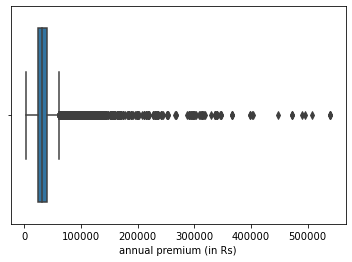

In [191]:
sns.boxplot(customerPD['annual premium (in Rs)'])

In [194]:
percentile25 = customerPD['annual premium (in Rs)'].quantile(0.25)
percentile75 = customerPD['annual premium (in Rs)'].quantile(0.75)

iqr = np.subtract(*np.percentile(1, [75, 25]))
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [195]:
customerPD[customerPD['annual premium (in Rs)'] > upper_limit]
customerPD[customerPD['annual premium (in Rs)'] < lower_limit]

,customer_id,annual premium (in Rs),sales channel code,vintage,response
5,6.0,2630.0,160.0,176.0,0.0
6,7.0,23367.0,152.0,249.0,0.0
15,16.0,2630.0,156.0,147.0,1.0
27,28.0,19135.0,152.0,57.0,0.0
30,31.0,2630.0,160.0,136.0,0.0
...,...,...,...,...,...
381074,381075.0,21113.0,152.0,248.0,0.0
381086,381087.0,2630.0,152.0,208.0,0.0
381092,381093.0,2630.0,124.0,130.0,0.0
381094,381095.0,2630.0,26.0,84.0,0.0


In [196]:
new_df = customerPD[customerPD['annual premium (in Rs)'] < upper_limit]
new_df.shape

(285829, 5)

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Skill Lync DS HARESH\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

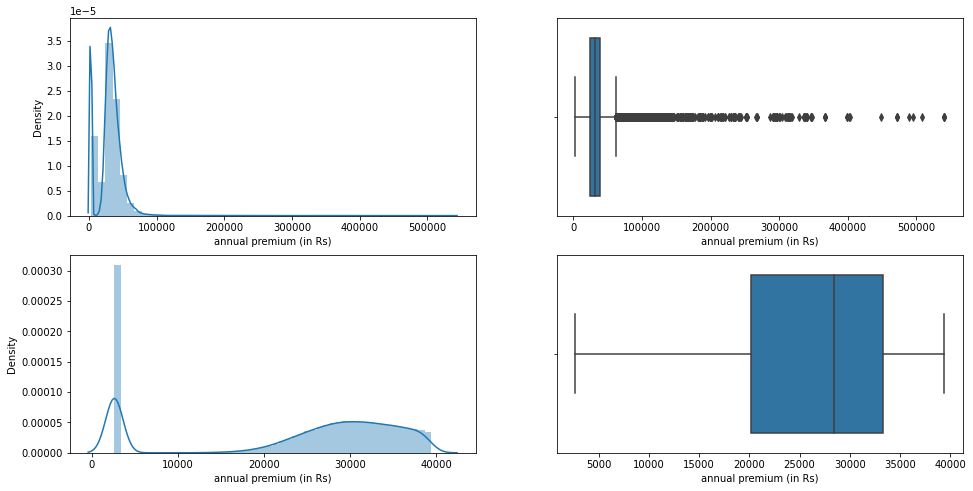

In [199]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(customerPD['annual premium (in Rs)'])
plt.subplot(2,2,2)
sns.boxplot(customerPD['annual premium (in Rs)'])
plt.subplot(2,2,3)
sns.distplot(new_df['annual premium (in Rs)'])
plt.subplot(2,2,4)
sns.boxplot(new_df['annual premium (in Rs)'])
plt.show()

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vintage'>

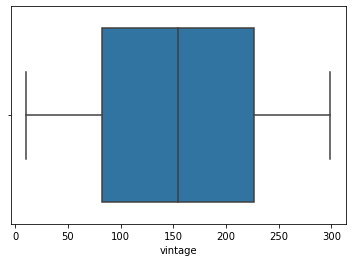

In [200]:
sns.boxplot(customerPD['vintage'])

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales channel code'>

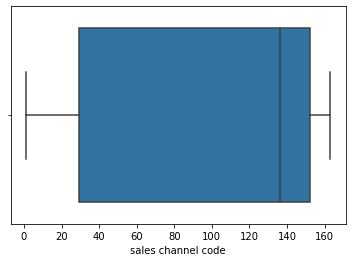

In [201]:
sns.boxplot(customerPD['sales channel code'])

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='response'>

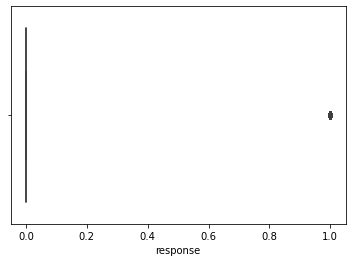

In [202]:
sns.boxplot(customerPD['response'])

## Outliers customerD

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

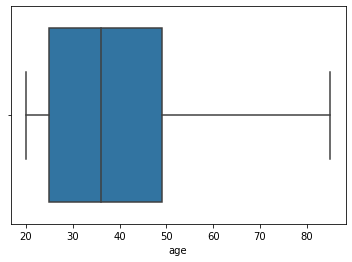

In [203]:
sns.boxplot(customerD['age'])

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_damage'>

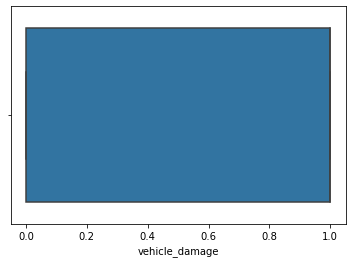

In [204]:
sns.boxplot(customerD['vehicle_damage'])

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previously_insured'>

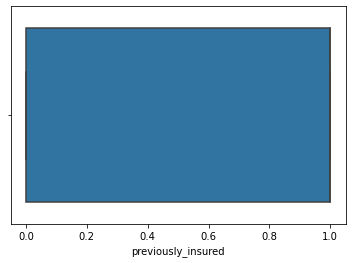

In [205]:
sns.boxplot(customerD['previously_insured'])

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region code'>

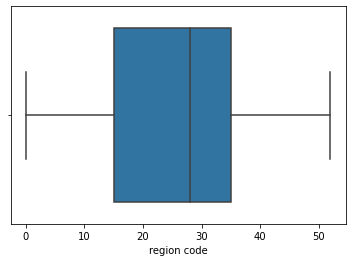

In [206]:
sns.boxplot(customerD['region code'])

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_age'>

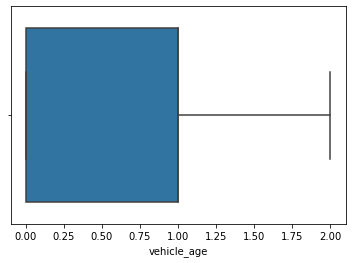

In [207]:
sns.boxplot(customerD['vehicle_age'])

# 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables

In [208]:
customerD

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage
0,1.0,0,44.0,1.0,28.0,1,2,1
1,2.0,0,76.0,1.0,3.0,1,1,0
2,3.0,0,47.0,1.0,28.0,1,2,1
3,4.0,0,21.0,1.0,11.0,0,0,0
4,5.0,1,29.0,1.0,41.0,0,0,0
...,...,...,...,...,...,...,...,...
183034,183035.0,1,23.0,1.0,7.0,0,0,0
183035,183036.0,1,25.0,1.0,34.0,1,0,0
183036,183037.0,0,21.0,1.0,46.0,0,0,0
183037,183038.0,0,32.0,1.0,18.0,0,0,0


In [209]:
customerPD

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [236]:
master_data=pd.merge(customerD,customerPD)

In [237]:
master_data

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,0,44.0,1.0,28.0,1,2,1,40454.0,26.0,217.0,1.0
1,1.0,0,44.0,1.0,28.0,1,2,1,37107.0,4.0,239.0,0.0
2,1.0,0,44.0,1.0,28.0,1,2,1,50889.0,26.0,247.0,0.0
3,1.0,0,44.0,1.0,28.0,1,2,1,31868.0,125.0,140.0,0.0
4,1.0,0,44.0,1.0,28.0,1,2,1,22679.0,29.0,174.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183251,183035.0,1,23.0,1.0,7.0,0,0,0,2630.0,160.0,100.0,0.0
183252,183036.0,1,25.0,1.0,34.0,1,0,0,34908.0,152.0,294.0,0.0
183253,183037.0,0,21.0,1.0,46.0,0,0,0,37320.0,160.0,63.0,0.0
183254,183038.0,0,32.0,1.0,18.0,0,0,0,27498.0,152.0,118.0,0.0


In [ ]:
master_data.set_index('customer_id')

# 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

### i. Gender wise average annual premium

### ii. Age wise average annual premium

### iii. Is your data balanced between the genders?

 ######      (Hint: Data is balanced if number of counts in each group is approximately same)

### iv. Vehicle age wise average annual premium.

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Skill Lync DS HARESH\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


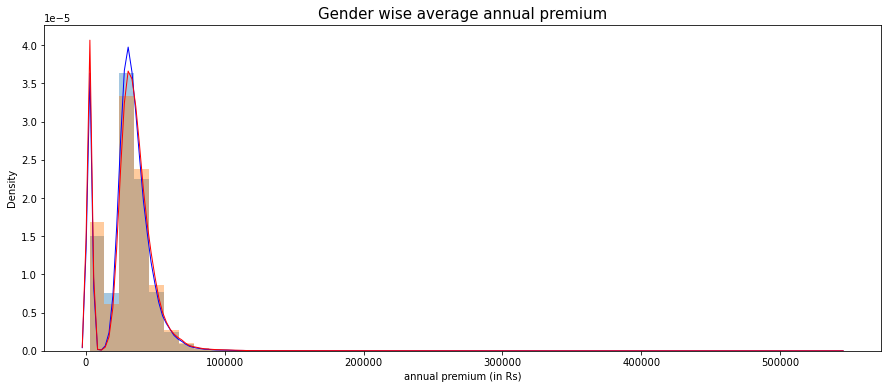

In [216]:
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['Gender'] == 1), 'annual premium (in Rs)'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(master_data.loc[(master_data['Gender'] == 0), 'annual premium (in Rs)'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Gender wise average annual premium', fontsize = 15)
plt.show()

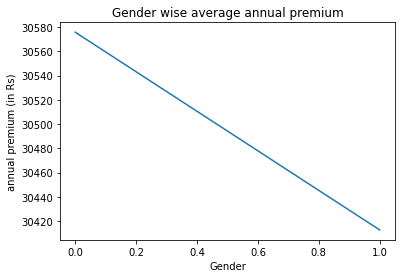

In [224]:
gender_wise=master_data.groupby('Gender')['annual premium (in Rs)'].mean()
result4_1.plot()
plt.title('Gender wise average annual premium')
plt.ylabel('annual premium (in Rs)')
plt.show()

In [ ]:
plt.figure(figsize = (15, 6))
#sns.distplot(master_data.loc[(master_data['age'] == 1), 'annual premium (in Rs)'], kde_kws = {"color": "b", "lw": 1, "label": "20"})
#sns.distplot(master_data.loc[(master_data['age'] == 0), 'annual premium (in Rs)'], kde_kws = {"color": "r", "lw": 1, "label": "60"})
plt.bar(master_data['age'],master_data['annual premium (in Rs)'])
plt.title('Age wise average annual premium', fontsize = 15)
plt.show()

D:\Skill Lync DS HARESH\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Skill Lync DS HARESH\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


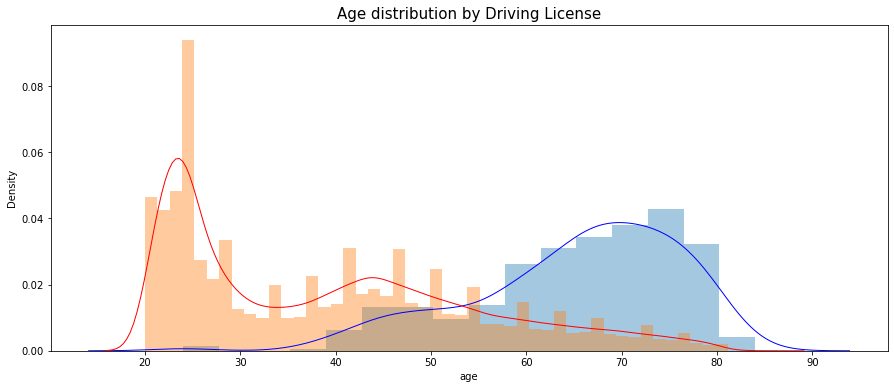

In [228]:
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['driving_licence_present'] == 0), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(master_data.loc[(master_data['driving_licence_present'] == 1), 'age'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()

In [240]:
master_data


,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,0,44.0,1.0,28.0,1,2,1,40454.0,26.0,217.0,1.0
1,1.0,0,44.0,1.0,28.0,1,2,1,37107.0,4.0,239.0,0.0
2,1.0,0,44.0,1.0,28.0,1,2,1,50889.0,26.0,247.0,0.0
3,1.0,0,44.0,1.0,28.0,1,2,1,31868.0,125.0,140.0,0.0
4,1.0,0,44.0,1.0,28.0,1,2,1,22679.0,29.0,174.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183251,183035.0,1,23.0,1.0,7.0,0,0,0,2630.0,160.0,100.0,0.0
183252,183036.0,1,25.0,1.0,34.0,1,0,0,34908.0,152.0,294.0,0.0
183253,183037.0,0,21.0,1.0,46.0,0,0,0,37320.0,160.0,63.0,0.0
183254,183038.0,0,32.0,1.0,18.0,0,0,0,27498.0,152.0,118.0,0.0


In [247]:
master_data

,customer_id,Gender,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,0,44.0,1.0,28.0,1,2,1,40454.0,26.0,217.0,1.0
1,1.0,0,44.0,1.0,28.0,1,2,1,37107.0,4.0,239.0,0.0
2,1.0,0,44.0,1.0,28.0,1,2,1,50889.0,26.0,247.0,0.0
3,1.0,0,44.0,1.0,28.0,1,2,1,31868.0,125.0,140.0,0.0
4,1.0,0,44.0,1.0,28.0,1,2,1,22679.0,29.0,174.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183251,183035.0,1,23.0,1.0,7.0,0,0,0,2630.0,160.0,100.0,0.0
183252,183036.0,1,25.0,1.0,34.0,1,0,0,34908.0,152.0,294.0,0.0
183253,183037.0,0,21.0,1.0,46.0,0,0,0,37320.0,160.0,63.0,0.0
183254,183038.0,0,32.0,1.0,18.0,0,0,0,27498.0,152.0,118.0,0.0


In [252]:
master_data.groupby('Gender',0).sum()

,customer_id,age,driving_licence_present,region code,previously_insured,vehicle_age,vehicle_damage,annual premium (in Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,
0,9.061406e+09,4058953.0,98978.0,2619531.0,57844,69258,54615,3.035355e+09,10579840.0,15336779.0,13702.0
1,7.675460e+09,3052600.0,83891.0,2220468.0,41984,43048,38356,2.554148e+09,9968607.0,12982548.0,8758.0


### 5. Is there any relation between Person Age and annual premium?

##### Hint: use correlation function (Correlation describes the relationship between two variables). 

##### Correlation coefficient < -0.5           - Strong negative relationship

##### Correlation coefficient > 0.5            -  Strong positive relationship

##### 0.5 < Correlation coefficient < 0.5   - There is no relationship. 

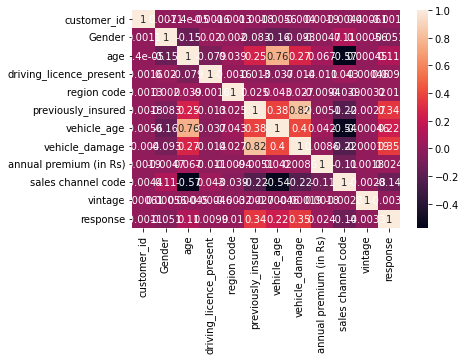

In [253]:
corrMatrix = master_data.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()